# Assignment-02


In [16]:
import numpy as np
import matplotlib.pyplot as plt

## Question 1

### Defining helper functions

In [17]:
def forward_backward(L, U, b):
    y = [0 for i in range(len(b))]

    for i in range(len(b)):
        sum = 0
        for j in range(i):
            sum += L[i][j] * y[j]
        y[i] = b[i] - sum

    x = [0 for i in range(len(b))]

    for i in reversed(range(len(b))):
        sum = 0
        for j in range(i + 1, len(b)):
            sum += U[i][j] * x[j]
        x[i] = (y[i] - sum) / U[i][i]

    return x
def partial_pivot(A, b):
    count = 0  
    n = len(A)
    for i in range(n - 1):
        if abs(A[i][i]) < 1e-10:
            for j in range(i + 1, n):
                if abs(A[j][i]) > abs(A[i][i]):
                    A[j], A[i] = (A[i], A[j], )  
                    count += 1
                    b[j], b[i] = ( b[i], b[j],)  
    return A, b, count

def crout(A):
    n = len(A)

    U = np.zeros((n,n))
    L = np.zeros((n,n))

    for i in range(len(A)):
        L[i][i] = 1

    for j in range(len(A)):
        for i in range(len(A)):
            sum = 0
            for k in range(i):
                sum += L[i][k] * U[k][j]
            if i == j:
                U[i][j] = A[i][j] - sum
            elif i > j:
                L[i][j] = (A[i][j] - sum) / U[j][j]
            else:
                U[i][j] = A[i][j] - sum

    return L, U

# solving x with crout's lu decomposition
def solvex_lu(A, b):
    partial_pivot(A, b)
    L, U = crout(A)
    x = forward_backward(L, U, b)
    return x

def poly_fit(X, Y, d = 1):
    
    n = len(X)
    p = d + 1  
    A = np.zeros((p, p))  
    b = np.zeros(p)  

    for i in range(p):
        for j in range(p):
            sum = 0
            for k in range(n):
                sum += X[k] ** (i + j)

            A[i, j] = sum

    for i in range(p):
        sum = 0
        for k in range(n):
            sum += X[k] ** i * Y[k]

        b[i] = sum

    x = solvex_lu(A, b)
    return x


def cheby_poly(x, order):
    if order == 0:return 1
    elif order == 1:return 2 * x - 1
    elif order == 2:return 8 * x**2 - 8 * x + 1
    elif order == 3:return 32 * x**3 - 48 * x**2 + 18 * x - 1


def cheby_fit(X, Y, d = 3):
    n = len(X)
    p = d + 1
    A = np.zeros((p, p))
    b = np.zeros(p)

    for i in range(p):
        for j in range(p):
            sum = 0
            for k in range(n):
                sum += cheby_poly(X[k], j) * cheby_poly(X[k], i)
            A[i, j] = sum

    for i in range(p):
        sum = 0
        for k in range(n):
            sum += cheby_poly(X[k], i) * Y[k]
        b[i] = sum

    x = solvex_lu(A, b)
    return x

### Main code

The coefficients obtained in the polynomial basis is :  [0.5746586674195995, 4.725861442142078, -11.128217777643616, 7.6686776229096685]
The coefficients obtained in the chebychev functions basis is : [1.1609694790335525, 0.39351446798815237, 0.04684983209010658, 0.23964617571596986]


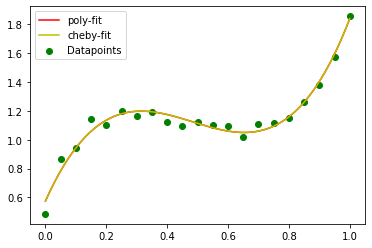

In [18]:
f = open('ass2_fit.txt', 'r')
data = np.genfromtxt(f, delimiter='')
f.close()


X =  [data[j][0] for j in range(len(data))]
Y = [data[j][1] for j in range(len(data))]

coeff = poly_fit(X, Y, 3)
coeff_c = cheby_fit(X, Y, 3)

a_0, a_1, a_2, a_3 = coeff[0], coeff[1], coeff[2], coeff[3]
c_0, c_1, c_2, c_3 = coeff_c[0], coeff_c[1], coeff_c[2], coeff_c[3]
print("The coefficients obtained in the polynomial basis is :  {}".format(coeff))
print("The coefficients obtained in the chebychev functions basis is : {}".format(coeff_c))

x = np.linspace(0, 1, 100)
y = a_0 + a_1 * x + a_2 * x**2 + a_3 * x**3
y_c = c_0 + c_1 * cheby_poly(x,1) + c_2 * cheby_poly(x,2)+ c_3 * cheby_poly(x,3)

plt.scatter(X, Y, c = 'g', label="Datapoints")
plt.plot(x, y, "r", label="poly-fit")
plt.plot(x, y_c, "y", label="cheby-fit")

plt.legend()
plt.show()

'''The coefficients obtained in the polynomial basis is :  [0.5746586674195995, 4.725861442142078, -11.128217777643616, 7.6686776229096685]
The coefficients obtained in the chebychev functions basis is : [1.1609694790335525, 0.39351446798815237, 0.04684983209010658, 0.23964617571596986]'''

## Question 2


### Defining helper functions

In [19]:


def mlcg(a, m, seed, N):
    x = seed
    r = []
    for i in range(N):
        x = (a * x) % m
        r.append(x)

    return np.array(r)

def f(x):
    return np.sqrt(1-x**2)
  
N=500000

def pi_rand(a, m, N,seed1,seed2):
    X = mlcg(a, m,seed1 , N)/m
    Y = mlcg(a, m, seed2, N)/m
    count=0
    for i in range(N):
        if(X[i]**2 +Y[i]**2) <=1:
            count+=1
    return count*(float(1/N))
  
def pi_mcinteg(a, m, N, func, seed):
    xrand = mlcg( a, m,seed, N)/m
    sum = 0
    for i in range(N):
        sum += func(xrand[i])
    return 1/ float(N) * sum

  


### Main code

In [20]:
print('*******************************************************************************************')
a = 65
m = 1021
print("Value of pi using random throw for a = {0},m = {1} is: {2} ".format(a,m,4*pi_rand(a,m,N,0.5,1.2)))
print("Value of pi using monte carlo integration for a = {0},m = {1} is: {2} ".format(a,m,4*pi_mcinteg(a,m,N,f,1.2)))
print('*******************************************************************************************')
a = 572
m = 16381
print("Value of pi using random throw for a = {0},m = {1} is: {2} ".format(a,m,4*pi_rand(a,m,N,0.5,1.2)))
print("Value of pi using monte carlo integration for a = {0},m = {1} is: {2} ".format(a,m,4*pi_mcinteg(a,m,N,f,1.2)))
print('*******************************************************************************************')


'''The coefficients obtained in the polynomial basis is :  [0.5746586674195995, 4.725861442142078, -11.128217777643616, 7.6686776229096685]
The coefficients obtained in the chebychev functions basis is : [1.1609694790335525, 0.39351446798815237, 0.04684983209010658, 0.23964617571596986]
<matplotlib.legend.Legend at 0x7f6510f7a580>

*******************************************************************************************
Value of pi using random throw for a = 65,m = 1021 is: 3.1332959999999996 
Value of pi using monte carlo integration for a = 65,m = 1021 is: 3.142638923121468 
*******************************************************************************************
Value of pi using random throw for a = 572,m = 16381 is: 3.140488 
Value of pi using monte carlo integration for a = 572,m = 16381 is: 3.141602571694661 
*******************************************************************************************'''

*******************************************************************************************
Value of pi using random throw for a = 65,m = 1021 is: 3.1332959999999996 
Value of pi using monte carlo integration for a = 65,m = 1021 is: 3.142638923121468 
*******************************************************************************************
Value of pi using random throw for a = 572,m = 16381 is: 3.140488 
Value of pi using monte carlo integration for a = 572,m = 16381 is: 3.141602571694661 
*******************************************************************************************


## Question 3

### Main code

In [21]:
def s(x):
    return (2*np.sqrt(1-x**2))**2

v = pi_mcinteg(a, m, N, s, 1.2)
print("The volume between the two cylinders is :",2*v) # factor of 2 because integration is from 0 to 1 whereas we need -1 to 1

'''The volume between the two cylinders is : 5.333241179338101'''

The volume between the two cylinders is : 5.333241179338101
